# Bell State Generator
This notebook examines a lossy bell-state generator, similar to that shown in Figure 1 of <cite data-cite="bartolucci2021">(bartolucci2021)</cite>.

First, the required modules are imported.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import lightworks as lw
from lightworks import emulator

The circuit for this can be built in the following way, in which modes 0-3 are the inputs, all containing a single photon and modes 4-7 are ancilla. This is not a physical circuit, and instead some re-arrangement of the modes would be required.

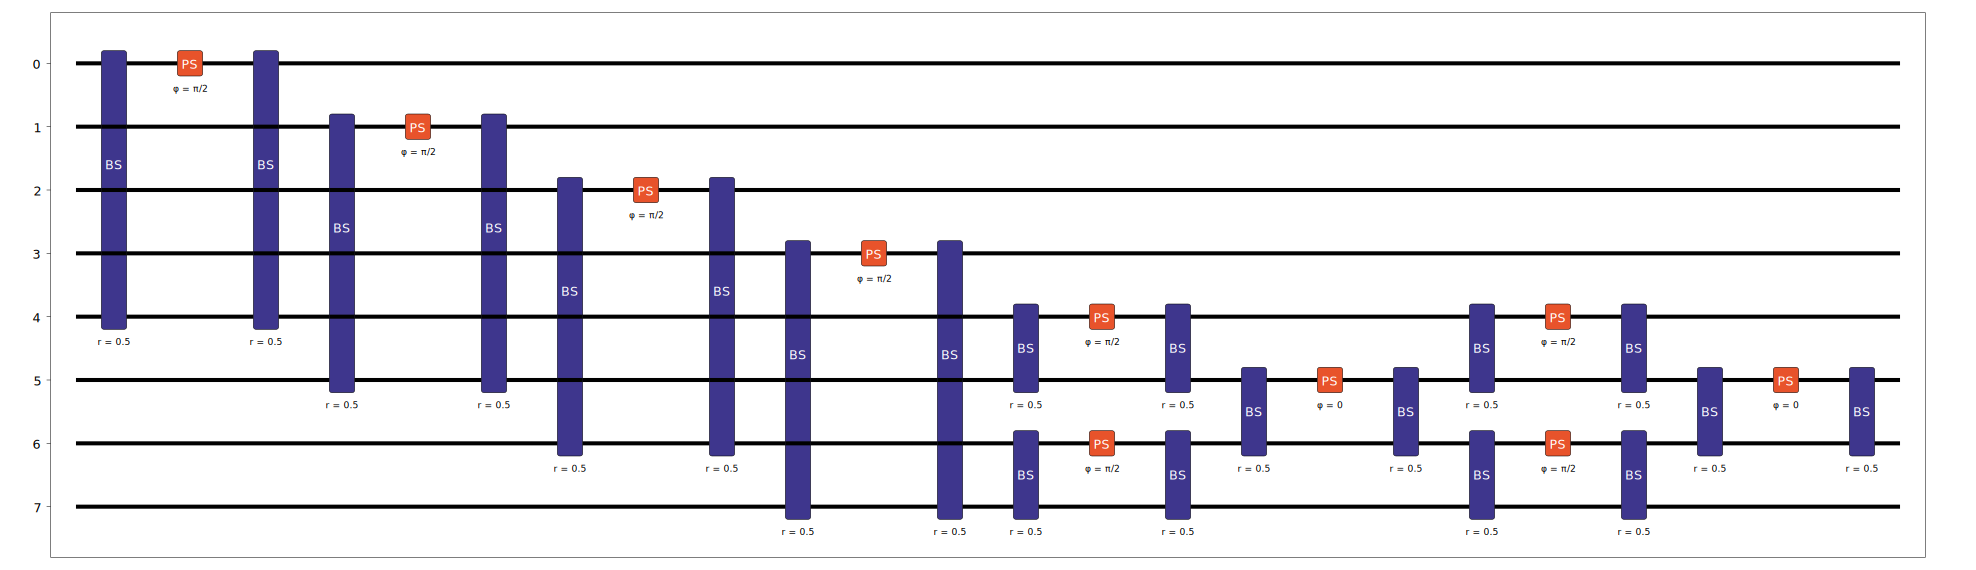

In [2]:
circ = lw.Circuit(8)

# Assigned per-element loss to 0.05
loss = lw.Parameter(0.05, label="loss")

for i in range(4):
    circ.bs(i, 4 + i, loss=loss)
    circ.ps(i, np.pi / 2)
    circ.bs(i, 4 + i, loss=loss)

circ.bs(4, 5, loss=loss)
circ.ps(4, np.pi / 2)
circ.bs(4, 5, loss=loss)

circ.bs(6, 7, loss=loss)
circ.ps(6, np.pi / 2)
circ.bs(6, 7, loss=loss)

circ.bs(5, 6, loss=loss)
circ.ps(5, 0)
circ.bs(5, 6, loss=loss)

circ.bs(4, 5, loss=loss)
circ.ps(4, np.pi / 2)
circ.bs(4, 5, loss=loss)

circ.bs(6, 7, loss=loss)
circ.ps(6, np.pi / 2)
circ.bs(6, 7, loss=loss)

circ.bs(5, 6, loss=loss)
circ.ps(5, 0)
circ.bs(5, 6, loss=loss)

circ.display()

## Sampling
In this case, we use the heralding function to select a particular measurement outcome from the ancilla modes. We then use the min_detection option to ensure that 4 photons total leave the circuit.

In [3]:
in_state = lw.State([1, 1, 1, 1, 0, 0, 0, 0])
herald_func = lambda s: s[4] == 1 and s[5] == 1 and s[6] == 0 and s[7] == 0

sampler = emulator.Sampler(circ, in_state)

The sample_N_inputs function is then chosen to test the expected output counts after 100,000 inputs into the system.

In [4]:
N_rep = 100000

results = sampler.sample_N_inputs(
    N_rep, post_select=herald_func, min_detection=4, seed=10
)
states, counts = [], []
for s, c in results.items():
    states.append(s[:4])
    counts.append(c)

As can be seen from the plot below, for the measurement pattern [1,1,0,0] on the ancilla modes, we usually get the states |1,0,0,1> and |0,1,1,0> across the other 4 modes, which is as expected. If we convert this to dual rail encoded qubits, then this corresponds to the state |01> + |10>, which is a bell state, showing the generator works correctly. We can also see how loss in the circuit leads to some errors presenting themselves in the operation.

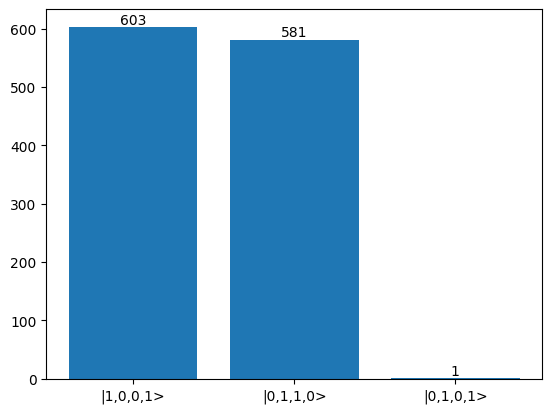

In [5]:
bars = plt.bar(range(len(states)), counts)
plt.bar_label(bars, counts)
plt.xticks(range(len(states)), states)
plt.show()